## Q2: Planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:
```python
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])
```
These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years
```python
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])
```
Finally, the names of the planets corresponding to these are:
```python
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]
```
(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

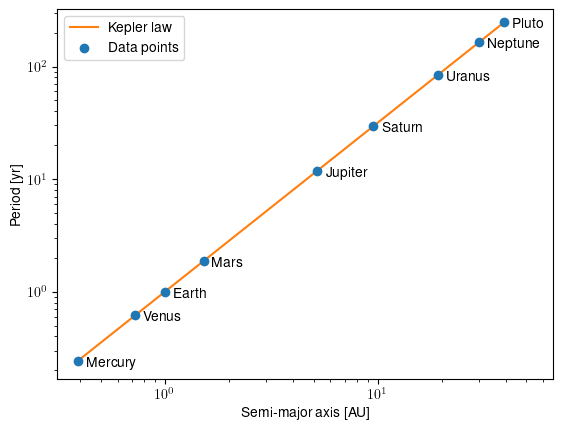

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

# data
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

# constants (in SI units)
G = 6.6743e-11
M_sun = 1.988e30
AU = 149597870700
yr = 365.25*24*60*60

# compute values
kepler = [2*np.pi*np.sqrt((sma*AU)**3/G/M_sun)/yr for sma in a]

# plot
fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"Semi-major axis [AU]")
ax.set_ylabel(r"Period [yr]")
ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(a,kepler,c="C1",label="Kepler law")
ax.scatter(a, P, label="Data points",zorder=2)

# annotate
for sma,per,name in zip(a,P,names):
    ax.text(sma*1.1, per*0.9, name)

ax.set_xlim(a[0]*0.8, a[-1]*1.7)
ax.set_ylim(P[0]*0.7, P[-1]*1.3)


plt.legend()
plt.show()

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


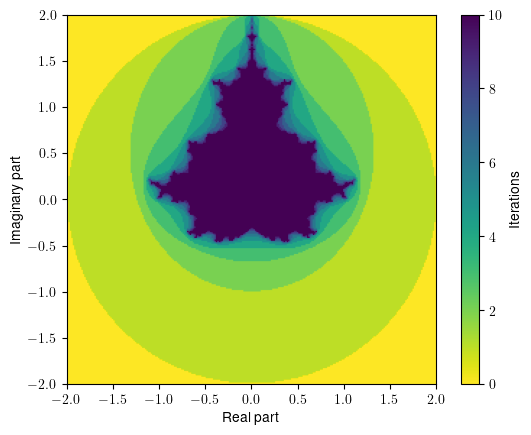

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

N_iterations = 10
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

c = xv + 1j*yv

z = np.zeros((N, N), dtype=np.complex128)
required_steps = np.zeros((N, N))

# iterate z_k
for _ in range(N_iterations):
    z = z**2 + c
    mask = np.abs(z) <= 2 # mask is 1 for the points still inside a radius of 2, 0 for those outside
    required_steps += mask # required_steps keeps the count of the iterations needed to get outside of 2
    
fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel("Real part")
ax.set_ylabel("Imaginary part")

img = ax.imshow(required_steps,extent=(x[0], x[-1], y[0], y[-1]),cmap="viridis_r")
plt.colorbar(img, ax=ax, label="Iterations")

plt.show()